This dataset includes a measure of yield on each treasury bond instrument for each tenor of maturity from 1 year to 30 year. (Attributes=30; SVENF01 - SVENF30).

It also includes the daily adjusted close price of the PIMCO Total Return Bond fund (Ticker=PTTAX). This is the target variable.

It includes 8071 daily observations from 1/13/1987 to 5/17/2019. You should delete the Date column for your models.

You should use StandardScaler to normalize all of the data, including the target variable.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('hw5_treasury yield curve data.csv')

In [3]:
df.head(5)

,Date,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,SVENF06,SVENF07,SVENF08,SVENF09,SVENF10,SVENF11,SVENF12,SVENF13,SVENF14,SVENF15,SVENF16,SVENF17,SVENF18,SVENF19,SVENF20,SVENF21,SVENF22,SVENF23,SVENF24,SVENF25,SVENF26,SVENF27,SVENF28,SVENF29,SVENF30,Adj_Close
0,5/17/2019,2.1224,2.0266,2.1023,2.2377,2.3790,2.5042,2.6069,2.6885,2.7530,2.8054,2.8498,2.8899,2.9283,2.9667,3.0063,3.0477,3.0912,3.1368,3.1843,3.2335,3.2840,3.3355,3.3876,3.4400,3.4925,3.5446,3.5962,3.6471,3.6970,3.7458,10.130177
1,5/16/2019,2.1239,2.0317,2.1096,2.2468,2.3901,2.5171,2.6217,2.7049,2.7710,2.8247,2.8703,2.9113,2.9503,2.9892,3.0291,3.0707,3.1143,3.1598,3.2071,3.2561,3.3063,3.3574,3.4091,3.4610,3.5130,3.5646,3.6156,3.6660,3.7153,3.7636,10.130177
2,5/15/2019,2.0874,1.9956,2.0844,2.2289,2.3736,2.4980,2.5984,2.6779,2.7418,2.7951,2.8422,2.8862,2.9293,2.9728,3.0173,3.0633,3.1107,3.1592,3.2087,3.2587,3.3089,3.3589,3.4086,3.4575,3.5055,3.5524,3.5980,3.6421,3.6847,3.7257,10.150118
3,5/14/2019,2.1319,2.0559,2.1451,2.2856,2.4257,2.5461,2.6428,2.7188,2.7791,2.8289,2.8726,2.9135,2.9539,2.9954,3.0386,3.0841,3.1318,3.1815,3.2330,3.2858,3.3396,3.3940,3.4485,3.5029,3.5568,3.6099,3.6622,3.7132,3.7630,3.8113,10.130177
4,5/13/2019,2.1051,2.0234,2.1180,2.2632,2.4051,2.5248,2.6198,2.6940,2.7532,2.8029,2.8472,2.8894,2.9315,2.9747,3.0195,3.0662,3.1146,3.1645,3.2155,3.2672,3.3192,3.3712,3.4227,3.4735,3.5234,3.5722,3.6196,3.6655,3.7098,3.7525,10.130177


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8071 entries, 0 to 8070
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8071 non-null   object 
 1   SVENF01    8071 non-null   float64
 2   SVENF02    8071 non-null   float64
 3   SVENF03    8071 non-null   float64
 4   SVENF04    8071 non-null   float64
 5   SVENF05    8071 non-null   float64
 6   SVENF06    8071 non-null   float64
 7   SVENF07    8071 non-null   float64
 8   SVENF08    8071 non-null   float64
 9   SVENF09    8071 non-null   float64
 10  SVENF10    8071 non-null   float64
 11  SVENF11    8071 non-null   float64
 12  SVENF12    8071 non-null   float64
 13  SVENF13    8071 non-null   float64
 14  SVENF14    8071 non-null   float64
 15  SVENF15    8071 non-null   float64
 16  SVENF16    8071 non-null   float64
 17  SVENF17    8071 non-null   float64
 18  SVENF18    8071 non-null   float64
 19  SVENF19    8071 non-null   float64
 20  SVENF20 

We have data for 30 maturities

In [5]:
df.describe()

,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,SVENF06,SVENF07,SVENF08,SVENF09,SVENF10,SVENF11,SVENF12,SVENF13,SVENF14,SVENF15,SVENF16,SVENF17,SVENF18,SVENF19,SVENF20,SVENF21,SVENF22,SVENF23,SVENF24,SVENF25,SVENF26,SVENF27,SVENF28,SVENF29,SVENF30,Adj_Close
count,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000
mean,3.785311,4.258972,4.669363,5.022430,5.318493,5.559644,5.750071,5.895135,6.000596,6.072112,6.114960,6.133891,6.133095,6.116199,6.086309,6.046063,5.997680,5.943023,5.883646,5.820842,5.755680,5.689046,5.621666,5.554136,5.486943,5.420479,5.355063,5.290948,5.228333,5.167371,5.509793
std,2.648060,2.498137,2.341348,2.221632,2.137801,2.080405,2.040337,2.010786,1.987244,1.966960,1.948384,1.930704,1.913565,1.896877,1.880709,1.865233,1.850679,1.837315,1.825424,1.815285,1.807164,1.801291,1.797858,1.797012,1.798842,1.803390,1.810643,1.820541,1.832984,1.847834,2.491110
min,0.072700,0.327300,0.630300,1.013000,1.424500,1.698200,1.807300,1.885000,1.942100,1.988200,2.030900,2.075900,2.127200,2.187500,2.258100,2.339500,2.431700,2.486300,2.220200,1.971100,1.722100,1.489600,1.283000,1.100800,0.941000,0.801800,0.681200,0.577100,0.487600,0.411100,2.801050
25%,1.144050,1.865600,2.536550,3.023050,3.544700,4.063300,4.409750,4.644300,4.774550,4.859500,4.914800,4.923700,4.913450,4.876650,4.783700,4.702150,4.630500,4.551250,4.472000,4.385000,4.281300,4.177450,4.090550,4.024800,3.982950,3.962100,3.887150,3.840900,3.825050,3.831350,3.130587
50%,3.986500,4.393300,4.505500,4.718900,5.051300,5.394600,5.663700,5.870800,5.993700,6.082400,6.133200,6.142700,6.148200,6.144300,6.128200,6.091400,6.036700,5.976100,5.908300,5.831600,5.735400,5.619600,5.503000,5.369900,5.228000,5.096700,4.979700,4.860800,4.758600,4.669000,4.956219
75%,5.901500,6.221250,6.461300,6.626600,6.779550,6.908050,7.049900,7.181600,7.297550,7.393350,7.480750,7.539750,7.588300,7.619000,7.625050,7.613300,7.582050,7.544100,7.498900,7.461800,7.418100,7.330550,7.233200,7.114900,6.998150,6.871050,6.765400,6.650600,6.535450,6.421850,8.051437
max,9.813800,9.887800,10.145600,10.459900,10.649900,10.741400,10.766300,10.747500,10.701500,10.640000,10.571000,10.532600,10.533800,10.534500,10.534800,10.535000,10.535000,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.150118


In [6]:
# Number of rows and columns
df.shape

(8071, 32)

The treasury dataset has 8071 rows and 32 columns.

Let's check for null values

In [7]:
df.isnull().sum()

Date         0
SVENF01      0
SVENF02      0
SVENF03      0
SVENF04      0
SVENF05      0
SVENF06      0
SVENF07      0
SVENF08      0
SVENF09      0
SVENF10      0
SVENF11      0
SVENF12      0
SVENF13      0
SVENF14      0
SVENF15      0
SVENF16      0
SVENF17      0
SVENF18      0
SVENF19      0
SVENF20      0
SVENF21      0
SVENF22      0
SVENF23      0
SVENF24      0
SVENF25      0
SVENF26      0
SVENF27      0
SVENF28      0
SVENF29      0
SVENF30      0
Adj_Close    0
dtype: int64

The dataset does not contain any null values.

### Univariate Analysis

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel=

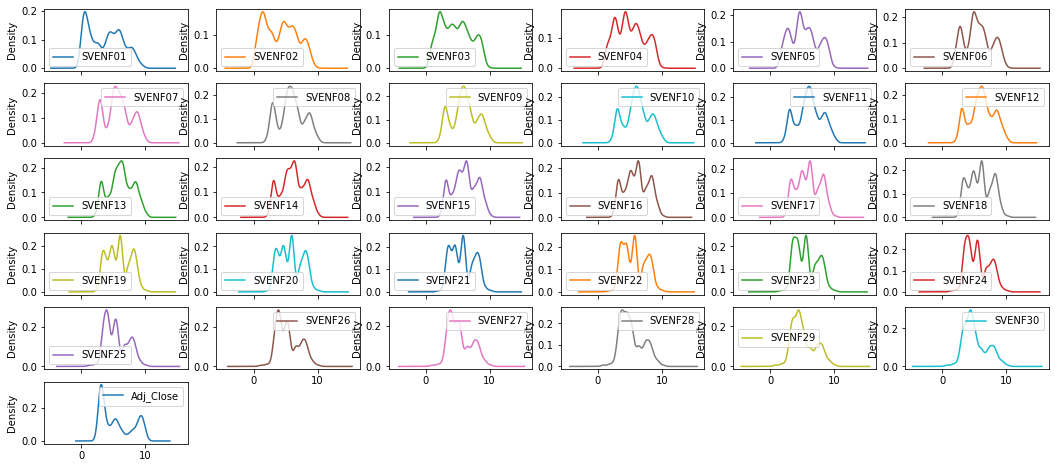

In [8]:
# Referred to this https://stackoverflow.com/questions/55567706/plot-all-pandas-dataframe-columns-separately

plt.rcParams["figure.figsize"] = (18, 8)
df.plot(kind='kde',subplots=True, layout=(6,6))

- We can observe that most of the columns follow a similar distribution and there are not any visible outliers.

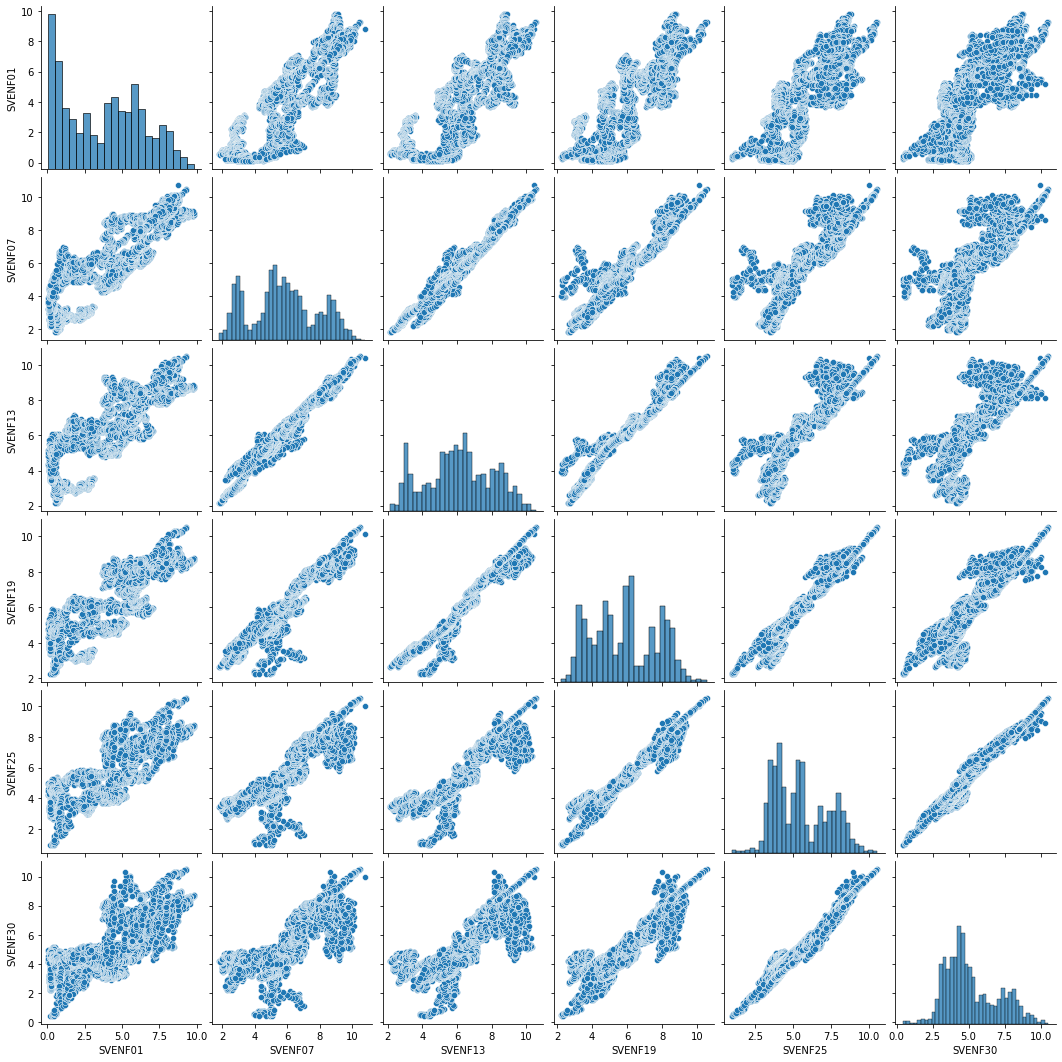

In [9]:
import seaborn as sns

sns.pairplot(df[['SVENF01','SVENF07','SVENF13','SVENF19','SVENF25','SVENF30']])

- We can observe some sort of pattern as the scatters gets less 'thicker' as the maturity increases.
- This is a clean dataset which we can use to build our models. 

Let's first check out the correlation matrix.

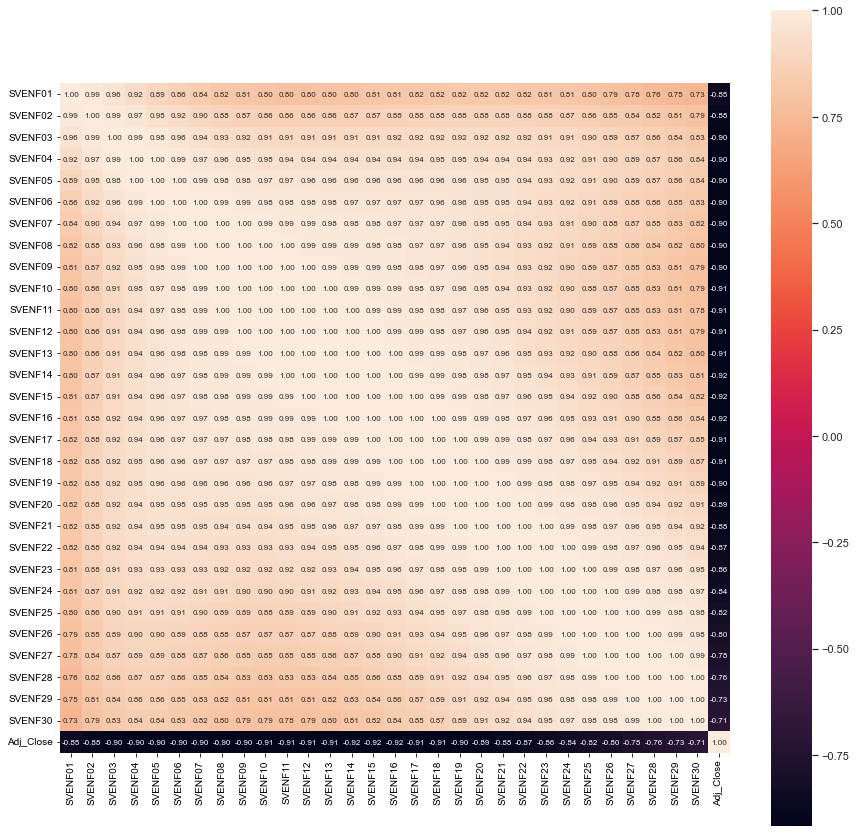

In [10]:
# Correlation matrix
fig, ax = plt.subplots(figsize=(15,15))
sns.set(font_scale=1)
sns.heatmap(df.corr(),cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':8});

- Any variables with correlation higher than 0.5 or lower than -0.5 are considered to have a high correlation
- We can observe most of the SVEN
- This is proof for what we observed in the pairplot above.

Let's build our models

In [11]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [12]:
scores = pd.DataFrame(columns=['Regression Type','MSE Train Score', 'MSE Test Score', 'R^2 Train Score','R^2 Test Score'])
scores

,Regression Type,MSE Train Score,MSE Test Score,R^2 Train Score,R^2 Test Score


In [30]:
# We define a function for regression

def regression(m1,x_train,x_test,y_train,y_test):

    m1.fit(x_train, y_train)

    print(str(m1))
    print('Intercept: ', m1.intercept_,'\n')
    print('Coefficients: ', m1.coef_,'\n')

    # Predict on the train data
    y_pred_train = m1.predict(x_train)

    # Predict on the test data
    y_pred_test = m1.predict(x_test)

    # print('\nFor testing set\n')
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    # print("R-squared: ", r2,'\n')

    # Calculate the mean squared error
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    # print("Mean Squared Error: ", mse,'\n')
    
    temp = pd.DataFrame({'Regression Type':[str(m1)+' PCA(n=3)'],'MSE Train Score':[mse_train], 'MSE Test Score':[mse_test], 'R^2 Train Score':[r2_train],'R^2 Test Score':[r2_test]})
    
    return temp

In [14]:
# df = df.drop(['Date'], axis=1)

x = df.drop(['Adj_Close','Date'], axis=1)
y = df['Adj_Close']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [15]:
m1 = linear_model.LinearRegression()
temp = regression(m1,x_train,x_test,y_train,y_test)
scores = pd.concat([scores, temp])

LinearRegression()
Intercept:  11.807492779668365 

Coefficients:  [  -4.83843828   53.15886154 -249.77609515  590.3976597  -686.9635643
  228.09887769  289.29370071 -302.62642323  -44.31624559  320.69207748
 -288.36927381  200.16366114   -0.89256855  -86.94013339  -96.64031266
   -7.50513023 -302.47703104  216.50764238  136.90241245  133.63875552
  562.97736488 -387.63320903  176.17955174 -418.55197044 -795.41172645
  238.76730553  102.69781344  839.1753386   -80.32795403 -336.50681656] 



#### SVM Regression

In [16]:
m1 = svm.SVR(kernel='linear')
temp = regression(m1,x_train,x_test,y_train,y_test)
scores = pd.concat([scores, temp])

SVR(kernel='linear')
Intercept:  [11.71120072] 

Coefficients:  [[ 0.28572594  0.17169213 -3.19161682  0.23808694  2.35389915  2.18458332
   0.83748636 -0.62812701 -1.61678499 -1.95815468 -1.71988534 -1.07877846
  -0.26394614  0.53204435  1.1573077   1.53098558  1.60480096  1.40637106
   0.97416685  0.38749677 -0.26566781 -0.89951124 -1.41729599 -1.75294843
  -1.8243422  -1.57914961 -0.98988451 -0.0140091   1.34216542  3.09620326]] 



In [17]:
scores

,Regression Type,MSE Train Score,MSE Test Score,R^2 Train Score,R^2 Test Score
0,LinearRegression(),0.60319,0.612102,0.902273,0.904131
0,SVR(kernel='linear'),0.658412,0.673976,0.893326,0.89444


#### PCA

Now we scale the data to perform PCA

In [18]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train_std = sc.fit_transform(x_train)
x_test_std = sc.fit_transform(x_test)

In [19]:
cov_mat = np.cov(x_train_std.T)
eigen_vals,eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[2.79579848e+01 1.22313057e+00 6.55411544e-01 1.45561136e-01
 1.99031388e-02 2.06243818e-03 2.84492074e-04 3.29679042e-05
 2.55310505e-06 2.02358034e-07 1.41807231e-08 1.14065172e-09
 1.87834629e-10 2.79223734e-10 1.97434631e-10 2.08170952e-10
 2.16456432e-10 2.61581610e-10 2.21833215e-10 2.26975997e-10
 2.24866358e-10 2.31123828e-10 2.57846136e-10 2.56092993e-10
 2.35380180e-10 2.52582295e-10 2.49758441e-10 2.38344568e-10
 2.43769490e-10 2.44978193e-10]


In [20]:
tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [21]:
len(var_exp)

30

In [22]:
cum_var_exp

array([0.93179697, 0.97256205, 0.99440592, 0.99925725, 0.99992059,
       0.99998933, 0.99999881, 0.99999991, 0.99999999, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

Above is the cumulative explained variance for the whole dataset

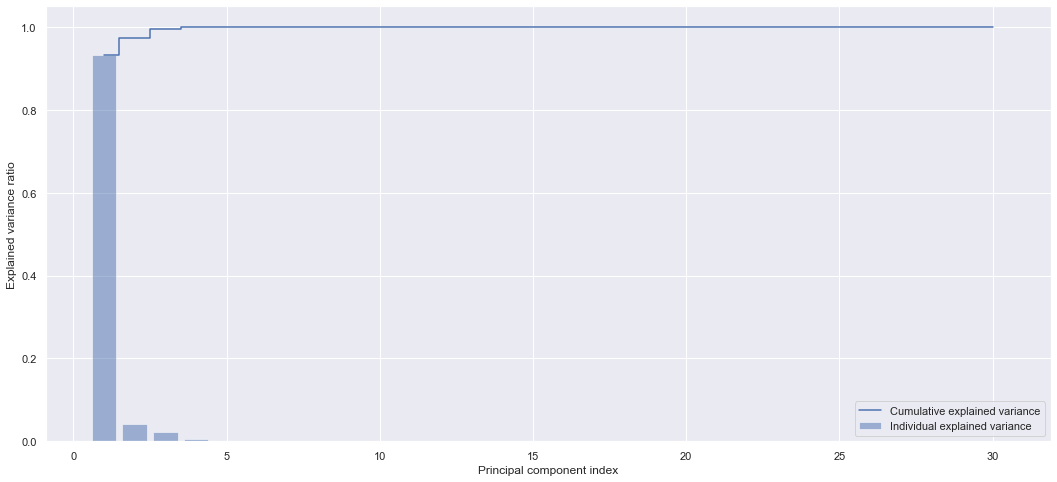

In [23]:
plt.bar(range(1,31), var_exp, alpha = 0.5,
        align='center',label='Individual explained variance')
plt.step(range(1,31), cum_var_exp, where='mid',
        label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

- We can observe that 99% of the variance is explained in the first 3 principal components. 
- Hence we drop all the other principal components and plot again

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
x_train_pca = pca.fit_transform(x_train_std)
x_test_pca = pca.transform(x_test_std)


In [25]:
cov_mat = np.cov(x_train_pca.T)
eigen_vals,eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[27.95798476  0.65541154  1.22313057]


In [26]:
tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [27]:
len(var_exp)

3

In [28]:
cum_var_exp

array([0.93703885, 0.97803325, 1.        ])

Above is the cumulative explained variance for the 3 dimensional dataset

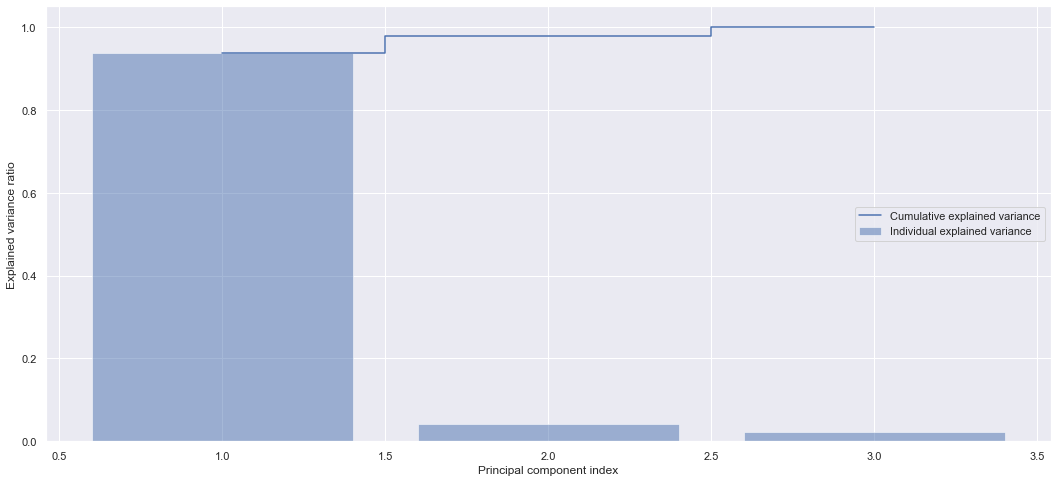

In [29]:
plt.bar(range(1,4), var_exp, alpha = 0.5,
        align='center',label='Individual explained variance')
plt.step(range(1,4), cum_var_exp, where='mid',
        label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='right')
plt.show()

Running linear & SVM regression

In [31]:
m1 = linear_model.LinearRegression()
temp = regression(m1,x_train_pca,x_test_pca,y_train,y_test)
scores = pd.concat([scores, temp])

LinearRegression()
Intercept:  5.4981571043731785 

Coefficients:  [-0.42364406 -0.48646442  0.26559618] 



In [32]:
m1 = svm.SVR(kernel='linear')
temp = regression(m1,x_train_pca,x_test_pca,y_train,y_test)
scores = pd.concat([scores, temp])
scores

SVR(kernel='linear')
Intercept:  [5.42846111] 

Coefficients:  [[-0.4440145  -0.5766427   0.33144908]] 



,Regression Type,MSE Train Score,MSE Test Score,R^2 Train Score,R^2 Test Score
0,LinearRegression(),0.60319,0.612102,0.902273,0.904131
0,SVR(kernel='linear'),0.658412,0.673976,0.893326,0.89444
0,LinearRegression() PCA(n=3),0.819556,0.860746,0.867218,0.865188
0,SVR(kernel='linear') PCA(n=3),0.848801,0.897589,0.86248,0.859417


The R^2 on the baseline model on the untransformed dataset is pretty high at 0.9. SVM Regression does not improve the R^2. We can observe that the R^2 decreases after we perform PCA. We should maybe try to perform LDA to see if we can improve the R^2.

In [33]:
print("My name is Hariharan Manickam")
print("My NetID is: hm32")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Hariharan Manickam
My NetID is: hm32
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
